___

<a href=''> <img src='../Ai_lab.jpg' /></a>
___
# Decision Trees and Random Forests in Python

## What is a Decision Tree?
* A decision tree is a predictive model that uses a flowchart-like structure to make decisions based on input data. It divides data into branches and assigns outcomes to leaf nodes. Decision trees are used for classification and regression tasks, providing easy-to-understand models.
* A decision tree is a hierarchical model used in decision support that depicts decisions and their potential outcomes, incorporating chance events, resource expenses, and utility. The tree structure is comprised of a root node, branches, internal nodes, and leaf nodes, forming a hierarchical, tree-like structure.
* It is a tool that has applications spanning several different areas. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.


 <img src='dt.png' />

## Decision Tree Terminologies
Before learning more about decision trees let’s get familiar with some of the terminologies:

* Root Nodes – It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.

* Decision Nodes – the nodes we get after splitting the root nodes are called Decision Node

* Leaf Nodes – the nodes where further splitting is not possible are called leaf nodes or terminal nodes.

* Sub-tree – just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.

* Pruning – is nothing but cutting down some nodes to stop overfitting.


 <img src='dt2.png' />



## Import Libraries

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [210]:
df = pd.read_csv('kyphosis.csv')

In [211]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [212]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


## EDA

We'll just check out a simple pairplot for this small dataset.

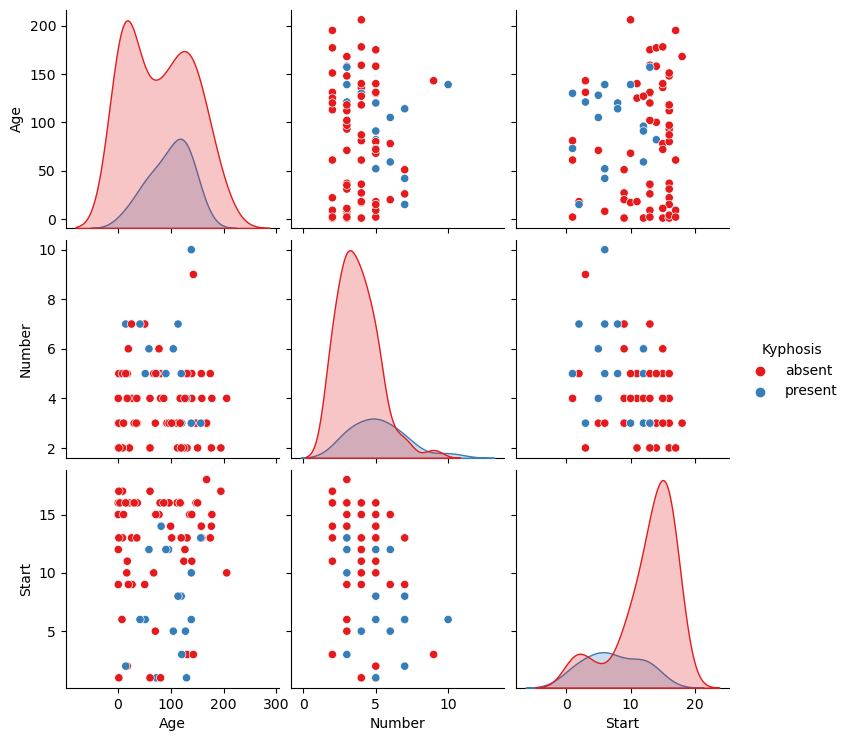

In [213]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [216]:
# Convert target labels to numeric values
y_numeric = y.map({'absent': 0, 'present': 1})

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.30)

In [218]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Trees

We'll start just by training a single decision tree.

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)

 In the above code, we have created a classifier object, in which we have passed two main parameters;

### criterion='entropy': 
Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.


### random_state=0": 
For generating the random states. 

In [221]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [222]:
predictions = dtree.predict(X_test)

In [223]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [224]:
from sklearn.metrics import classification_report,confusion_matrix

In [225]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.44      0.80      0.57         5

    accuracy                           0.76        25
   macro avg       0.69      0.78      0.70        25
weighted avg       0.84      0.76      0.78        25



In [226]:
print(confusion_matrix(y_test,predictions))

[[15  5]
 [ 1  4]]


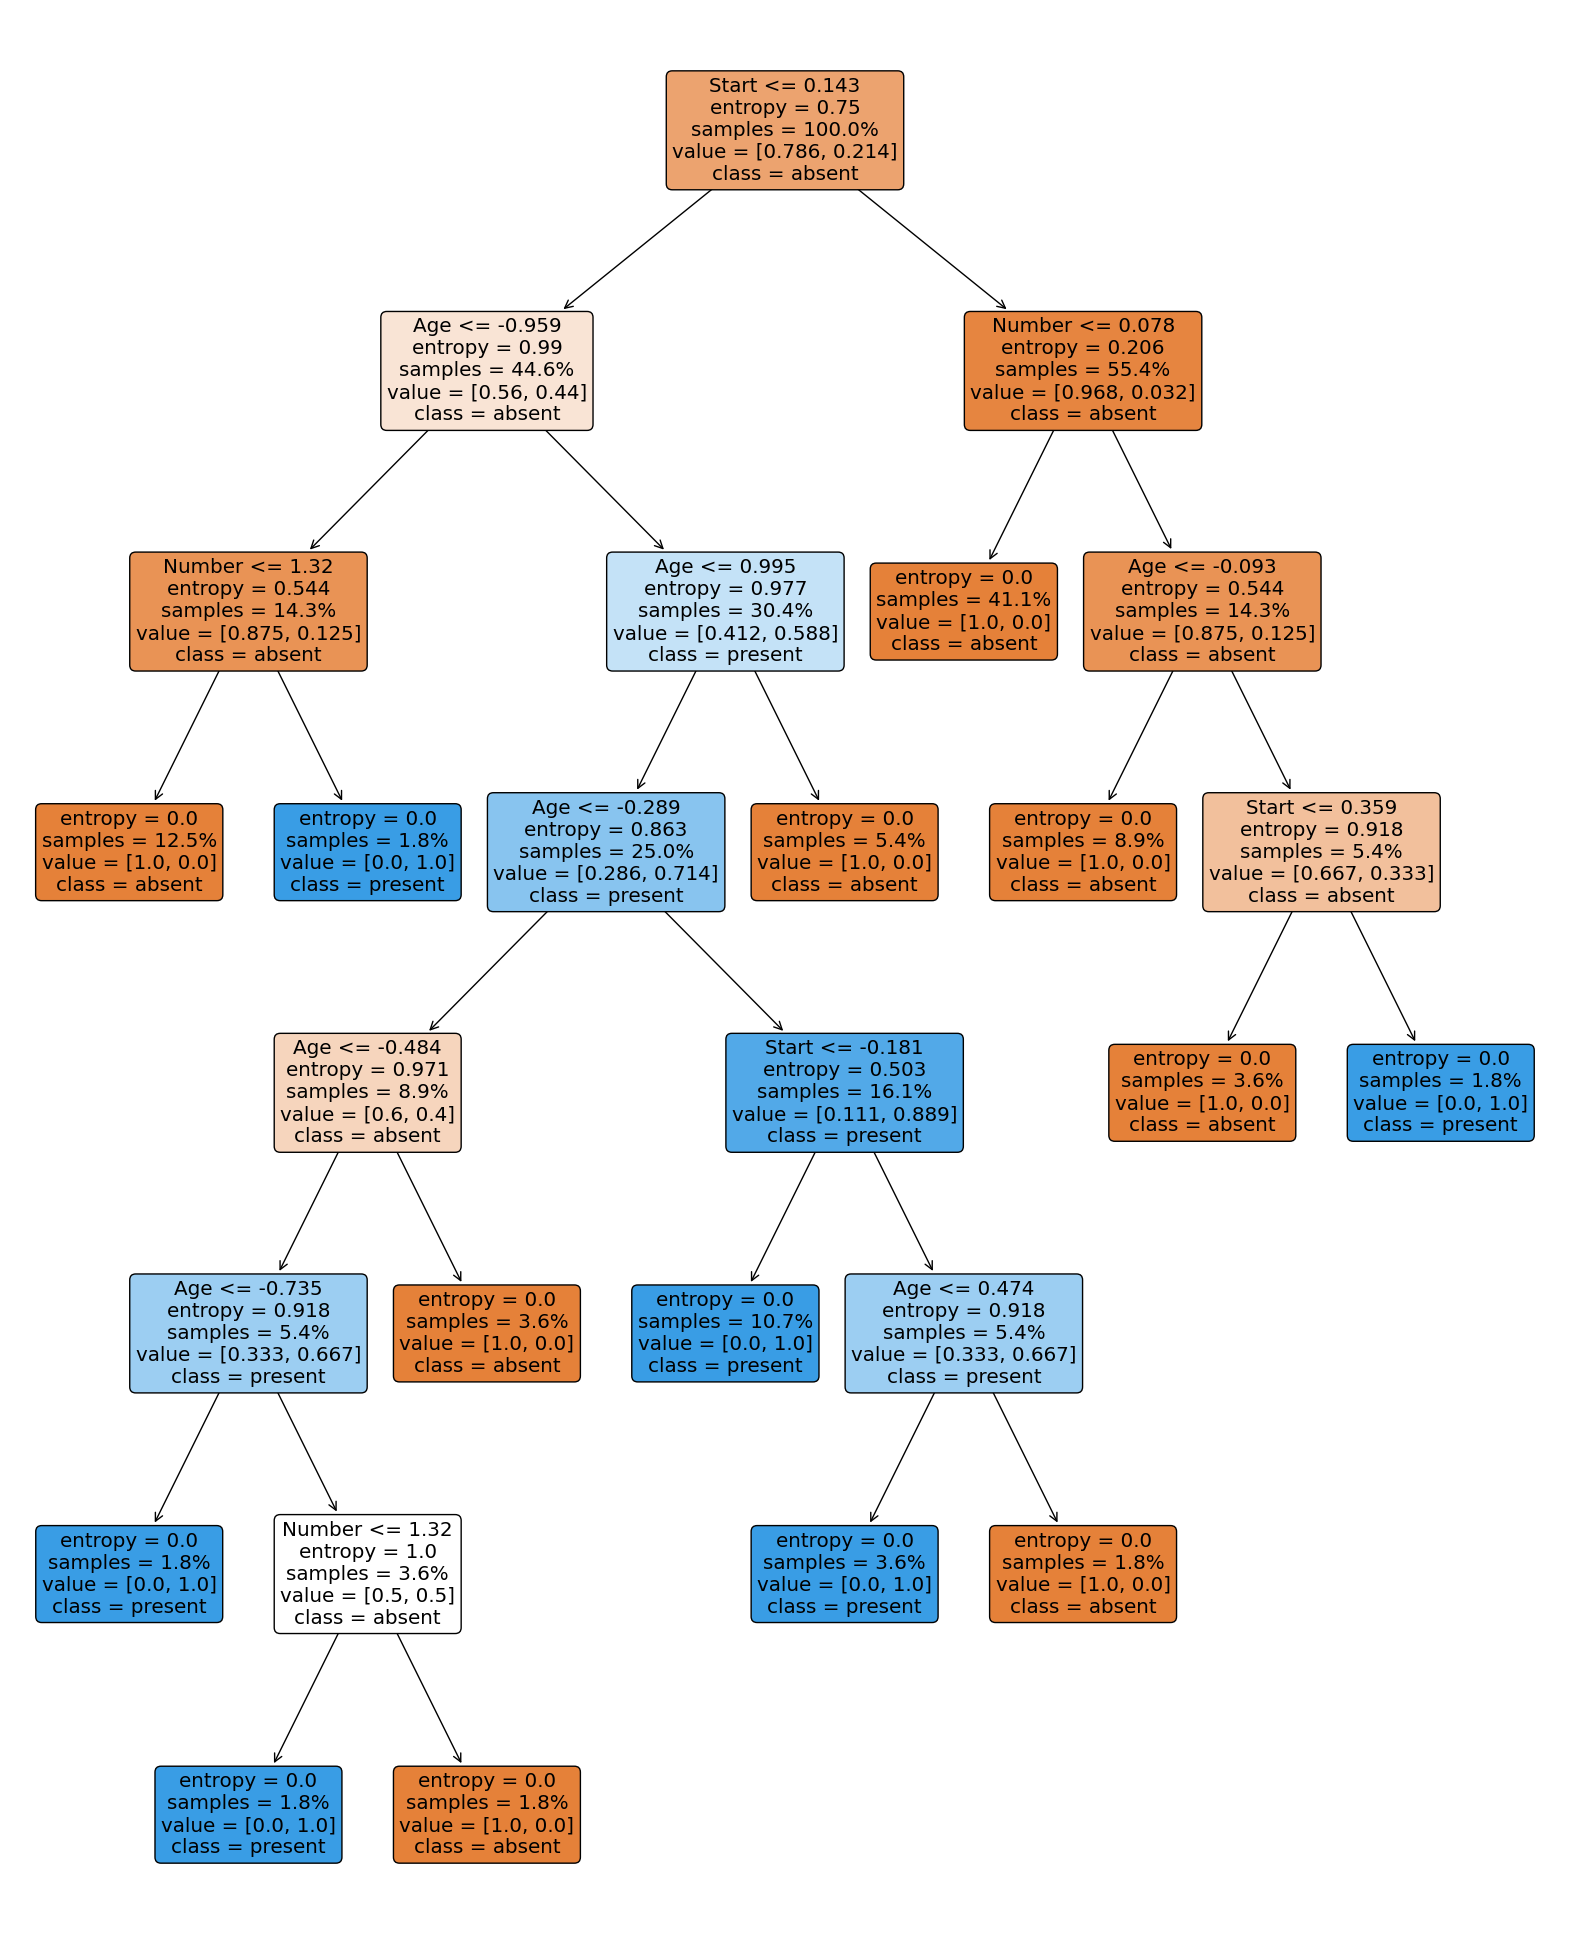

In [242]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(dtree,feature_names=X.columns,class_names=['absent', 'present'],rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True
        )
plt.show()

# Random Forest algorithm
The Random Forest algorithm is a popular machine learning technique that is used for both classification and regression tasks. Popular decision tree algorithms include Random Forest, ID3, C4.5 and CART. Random Forest is considered one of the best algorithms as it combines multiple decision trees to improve accuracy and reduce overfitting. It is an ensemble learning method that combines multiple decision trees to make predictions.
Here's a simple explanation of how the Random Forest algorithm works:
1. Data Preparation: The algorithm requires a labeled dataset, where the input features (attributes) are used to predict a target variable. The dataset is divided into a training set and a testing set.
2. Building Decision Trees: Random Forest creates a collection of decision trees. Each decision tree is built using a random subset of the training data. This random subset is known as a bootstrap sample. Additionally, at each node of the decision tree, only a random subset of the features is considered for splitting the data.
3. Voting Mechanism: To make a prediction, the Random Forest algorithm combines the predictions of all the decision trees. For classification tasks, the most common class predicted by the trees is chosen as the final prediction. For regression tasks, the average of all the predictions is taken.
4. Bagging and Randomness: Random Forest introduces two key concepts - bagging and randomness. Bagging refers to the process of creating multiple decision trees on different subsets of the data. Randomness is introduced by considering random subsets of features at each node, which helps to reduce overfitting and improve the model's generalization.
5. Predictions and Evaluation: Once the Random Forest model is trained, it can be used to make predictions on the testing data. The accuracy of the predictions can be evaluated using various performance metrics such as accuracy, precision, recall, or mean squared error, depending on the problem type.

Some key advantages of the Random Forest algorithm include its ability to handle large datasets with high dimensionality, robustness against overfitting, and good performance in both classification and regression tasks. However, it may not be as interpretable as individual decision trees.


# Random Forests

Now let's compare the decision tree model to a random forest.

In [233]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100, criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [235]:
# Extract single tree
estimator = rfc.estimators_[5]

In [236]:
rfc_pred = rfc.predict(X_test)

In [237]:
print(confusion_matrix(y_test,rfc_pred))

[[18  2]
 [ 2  3]]


In [239]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.60      0.60      0.60         5

    accuracy                           0.84        25
   macro avg       0.75      0.75      0.75        25
weighted avg       0.84      0.84      0.84        25



In [244]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                class_names = ['absent', 'present'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
go to this website:
    https://onlineconvertfree.com/convert-format/dot-to-png/

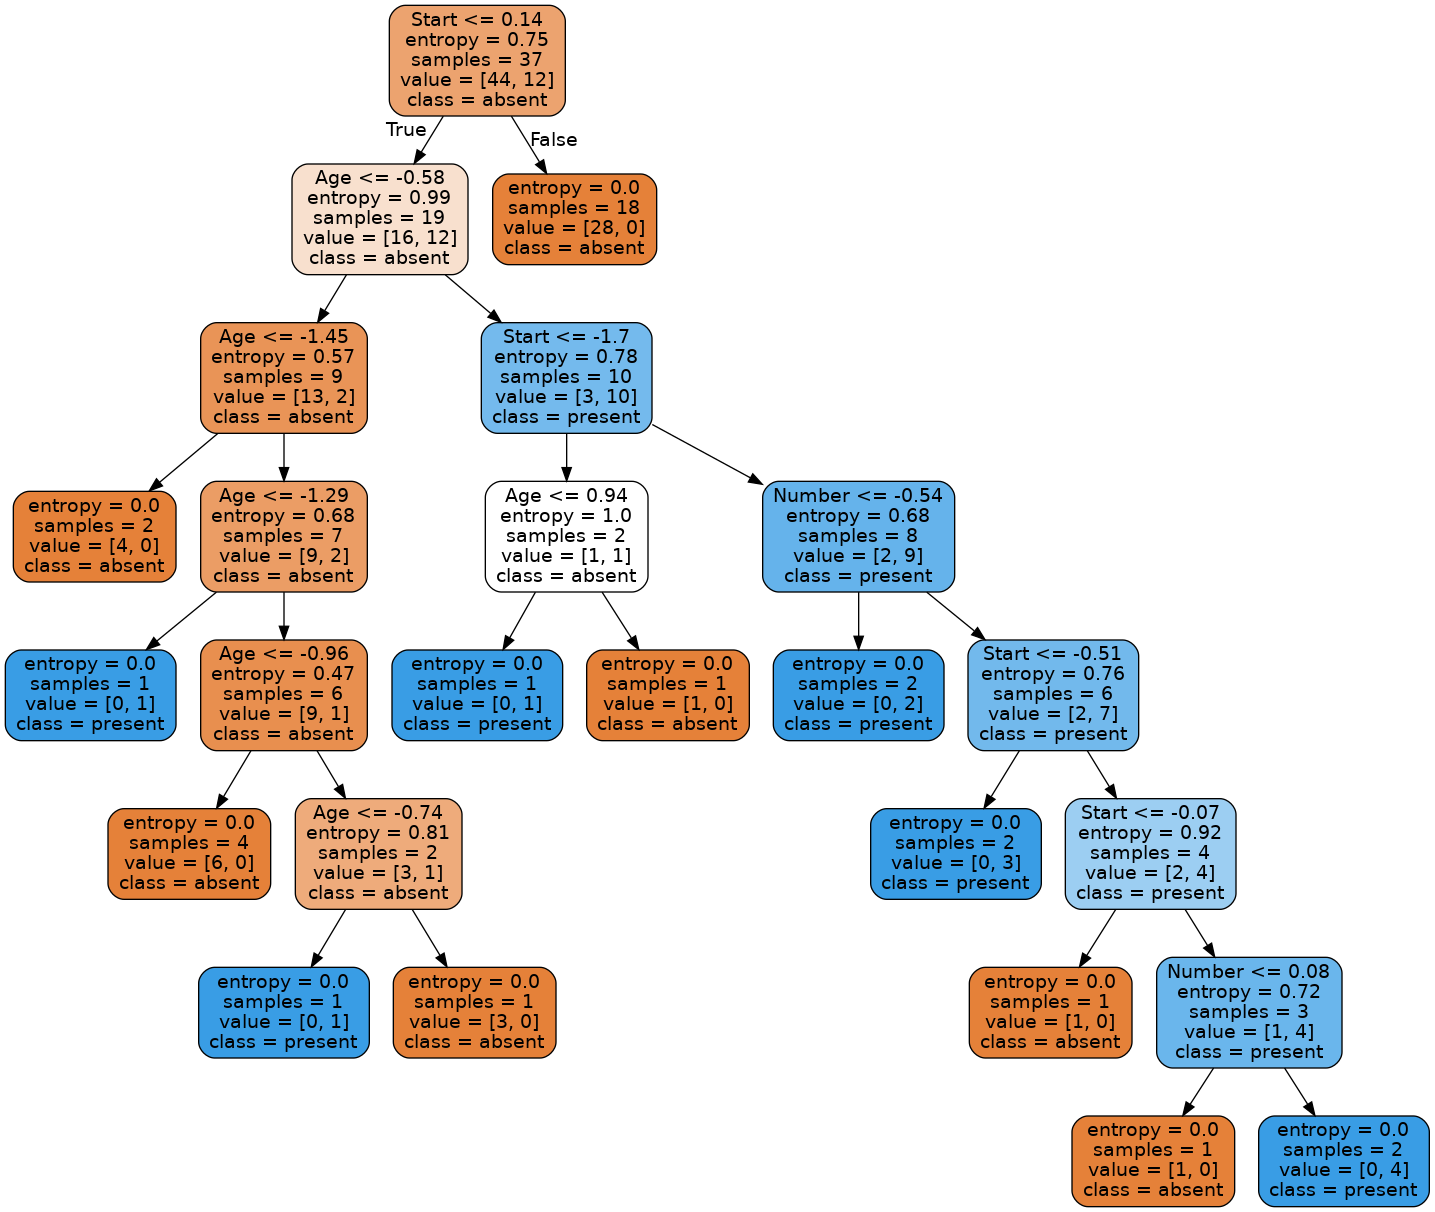

In [251]:
from IPython.display import Image
Image(filename = 'tree.png')

# Great Job!